In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv(r"D:\Personal Projects\cancer_issue_cleaned.csv")
cancer.head()

,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,Not Taken,South
1,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


In [4]:
continuous_variables = ['Age','BMI','TumorSize','SurvivalMonths']
categorical_variables = ['Gender','Race/Ethnicity','SmokingStatus','FamilyHistory','CancerType','Stage','TreatmentType',
                        'TreatmentResponse', 'Recurrence', 'GeneticMarker', 'HospitalRegion']

## Categorical Variable

In [5]:
from scipy.stats import chi2_contingency

In [8]:
# List of categorical variables
categorical_variables = [
    'Gender', 'Race/Ethnicity', 'SmokingStatus', 'FamilyHistory', 'Recurrence', 
    'Stage', 'TreatmentType', 'TreatmentResponse', 'GeneticMarker', 'HospitalRegion'
]

# Dependent variable
dependent_variable = 'CancerType'

# Store results
results = []

# Iterate through each categorical variable
for var in categorical_variables:
    # Create a cross table
    cross_table = pd.crosstab(cancer[var], cancer[dependent_variable])
    
    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(cross_table)
    
    # Append results
    results.append({
        'Variable': var,
        'Chi-Square': chi2,
        'P-Value': p,
        'Degrees of Freedom': dof,
        'Significant': p < 0.05  # Mark as significant if p-value < 0.05
    })

# Convert results to DataFrame
results_cancer = pd.DataFrame(results)

results_cancer

,Variable,Chi-Square,P-Value,Degrees of Freedom,Significant
0,Gender,7.548541,0.182934,5,False
1,Race/Ethnicity,21.410173,0.373354,20,False
2,SmokingStatus,4.495642,0.922231,10,False
3,FamilyHistory,6.798490,0.236063,5,False
4,Recurrence,3.799541,0.578623,5,False
5,Stage,23.334874,0.077284,15,False
6,TreatmentType,11.076334,0.747165,15,False
7,TreatmentResponse,6.239697,0.794739,10,False
8,GeneticMarker,15.993238,0.382501,15,False
9,HospitalRegion,17.850599,0.270601,15,False


#### The categorical varibles shows no statistical significanance with dependent variables.

## Numeric Variable

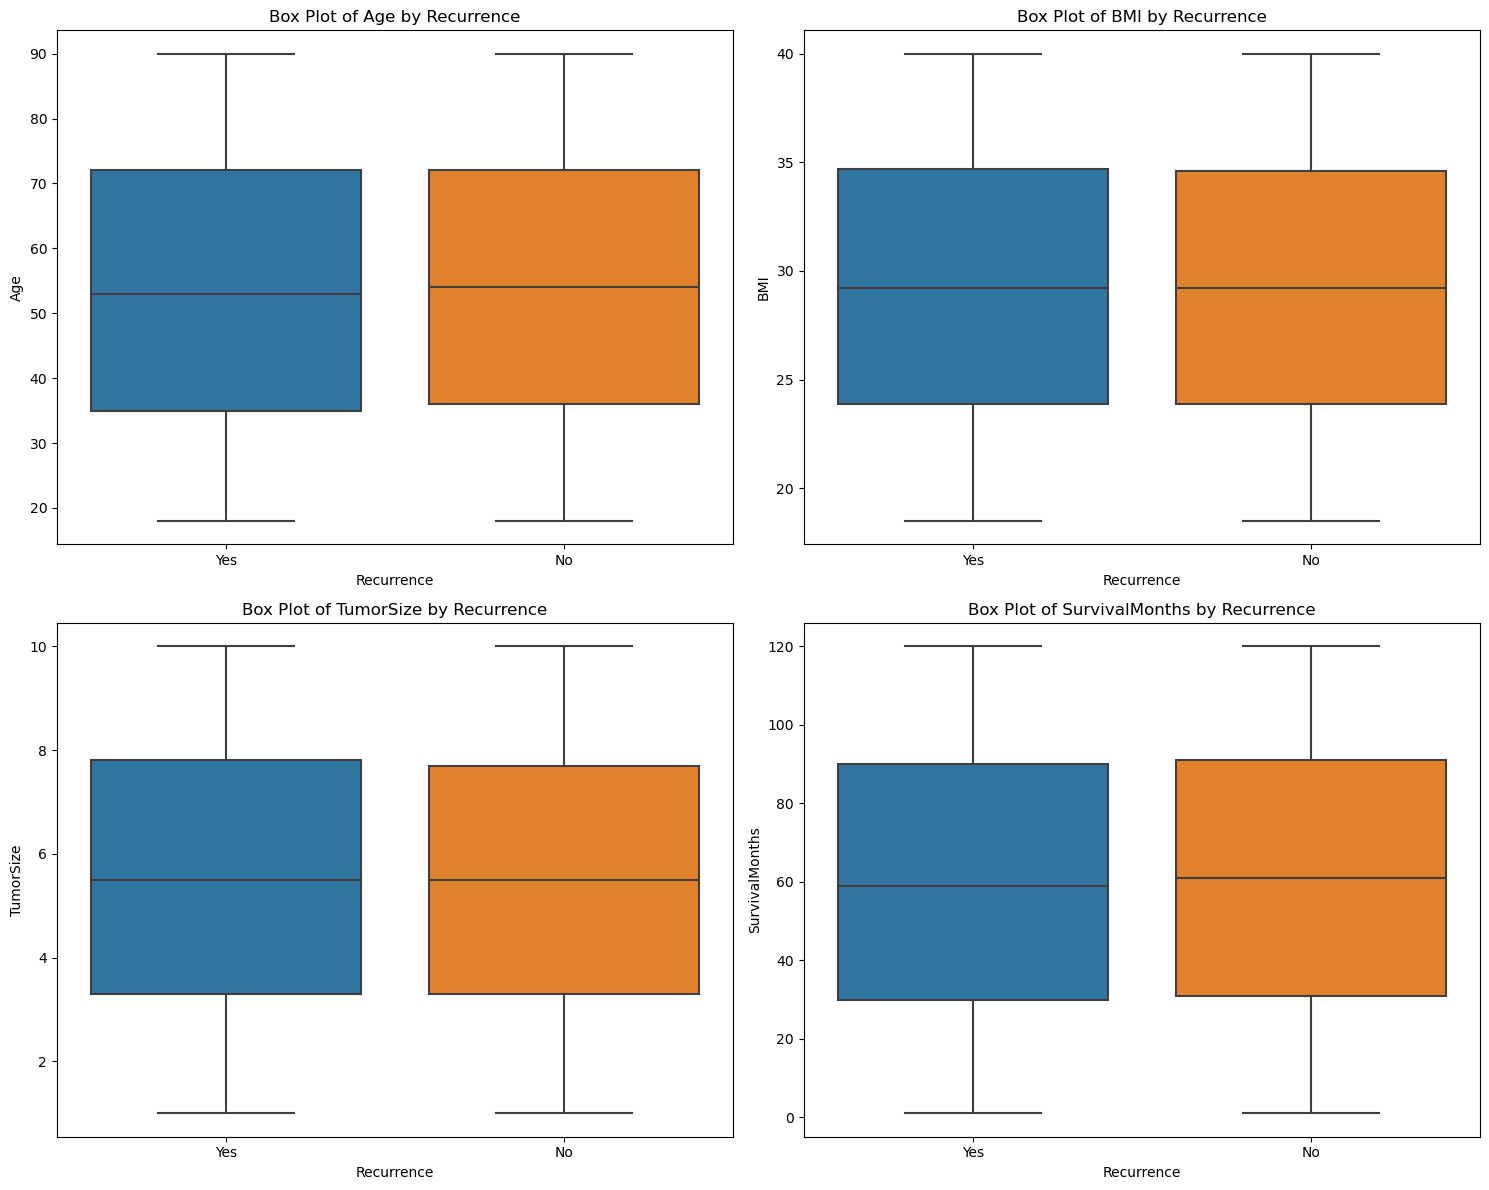

In [30]:
# Create subplots for each variable
plt.figure(figsize=(15, 12))

# Box plot for 'Age'
plt.subplot(2, 2, 1)
sns.boxplot(x='Recurrence', y='Age', data=cancer)
plt.title('Box Plot of Age by Recurrence')
plt.xlabel('Recurrence')
plt.ylabel('Age')

# Box plot for 'BMI'
plt.subplot(2, 2, 2)
sns.boxplot(x='Recurrence', y='BMI', data=cancer)
plt.title('Box Plot of BMI by Recurrence')
plt.xlabel('Recurrence')
plt.ylabel('BMI')

# Box plot for 'TumorSize'
plt.subplot(2, 2, 3)
sns.boxplot(x='Recurrence', y='TumorSize', data=cancer)
plt.title('Box Plot of TumorSize by Recurrence')
plt.xlabel('Recurrence')
plt.ylabel('TumorSize')

# Box plot for 'TumorSize'
plt.subplot(2, 2, 4)
sns.boxplot(x='Recurrence', y='SurvivalMonths', data=cancer)
plt.title('Box Plot of SurvivalMonths by Recurrence')
plt.xlabel('Recurrence')
plt.ylabel('SurvivalMonths')

plt.tight_layout()
plt.show()

#### No relationship is detected in box_plot

In [19]:
cancer_corr = cancer[['Age','BMI','TumorSize','SurvivalMonths']].corr()
cancer_corr

,Age,BMI,TumorSize,SurvivalMonths
Age,1.000000,-0.002575,-0.007688,-0.003520
BMI,-0.002575,1.000000,0.003945,0.008418
TumorSize,-0.007688,0.003945,1.000000,0.001953
SurvivalMonths,-0.003520,0.008418,0.001953,1.000000


<Axes: >

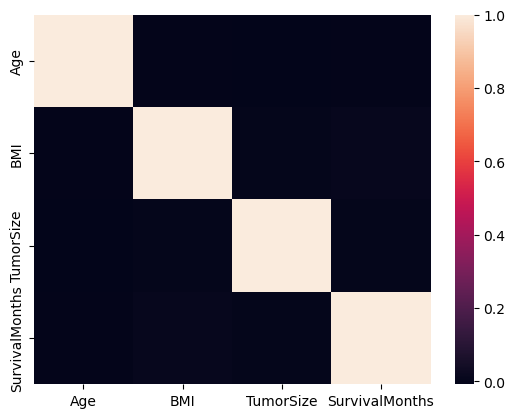

In [21]:
sns.heatmap(cancer_corr)

#### The continuous variables barely contains any relatinship since the value of correlation coefficient is nearly zero.So, there is no multicollinearity problem.